## Connect with Google Drive

In [1]:
!pip install gdown --quiet

In [2]:
import gdown

url = "https://drive.google.com/uc?id=1RhakmYA0l99TEQLbHan9rfEyj12hPYL8"

output = 'video.mp4'

gdown.download(url, output)

Downloading...
From (original): https://drive.google.com/uc?id=1RhakmYA0l99TEQLbHan9rfEyj12hPYL8
From (redirected): https://drive.google.com/uc?id=1RhakmYA0l99TEQLbHan9rfEyj12hPYL8&confirm=t&uuid=0b0db383-a17f-4c74-88bf-a17796fcf196
To: /kaggle/working/video.mp4
100%|██████████| 664M/664M [00:11<00:00, 57.8MB/s] 


'video.mp4'

In [3]:
SOURCE_VIDEO_PATH = "/kaggle/working/video.mp4"

## Check GPU access

In [4]:
!nvidia-smi

Thu Apr 18 12:28:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              27W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLOv8

In [6]:
!pip install ultralytics==8.0.196 --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5563.1/8062.4 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

In [8]:
!pip install --upgrade pip --quiet

In [9]:
!pip install --upgrade jupyter-lsp packaging shapely --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.3.0 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.1.4 which is incompatible.
cudf 23.8.0 requires protobuf<5,>=4.21, but you have protobuf 3.20.3 which is incompatible.
cuml 23.8.0 requires dask==2023.7.1, but you have dask 2024.1.0 which is incompatible.
cuml 23.8.0 requires distributed==2023.7.1, but you have distributed 2024.1.0 which is incompatible.
dask-cuda 23.8.0 require

In [9]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="FMJblBkjpLkjWDc3Sr3N")
project = rf.workspace("fyp-fqnbg").project("mainbox-segmentation")
dataset = project.version(1).download("yolov8")


mkdir: cannot create directory '/kaggle/working/datasets': File exists
/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Mainbox-segmentation-1 in yolov8:: 100%|██████████| 968/968 [00:00<00:00, 6731.17it/s]


## Custom Training

In [10]:
%cd {HOME}

# !yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

# Start training from a pretrained *.pt model
!yolo task=segment mode=train data={dataset.location}/data.yaml model=yolov8m-seg.pt epochs=100 imgsz=640

/kaggle/working
100%|██████████████████████████████████████| 52.4M/52.4M [00:00<00:00, 72.9MB/s]
New https://pypi.org/project/ultralytics/8.2.1 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/kaggle/working/datasets/Mainbox-segmentation-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False,

In [11]:
!ls {HOME}/runs/segment/train

BoxF1_curve.png					  results.png
BoxPR_curve.png					  train_batch0.jpg
BoxP_curve.png					  train_batch1.jpg
BoxR_curve.png					  train_batch2.jpg
MaskF1_curve.png				  train_batch2160.jpg
MaskPR_curve.png				  train_batch2161.jpg
MaskP_curve.png					  train_batch2162.jpg
MaskR_curve.png					  val_batch0_labels.jpg
args.yaml					  val_batch0_pred.jpg
confusion_matrix.png				  val_batch1_labels.jpg
confusion_matrix_normalized.png			  val_batch1_pred.jpg
events.out.tfevents.1713443922.d47fe23b4914.88.0  val_batch2_labels.jpg
labels.jpg					  val_batch2_pred.jpg
labels_correlogram.jpg				  weights
results.csv


/kaggle/working


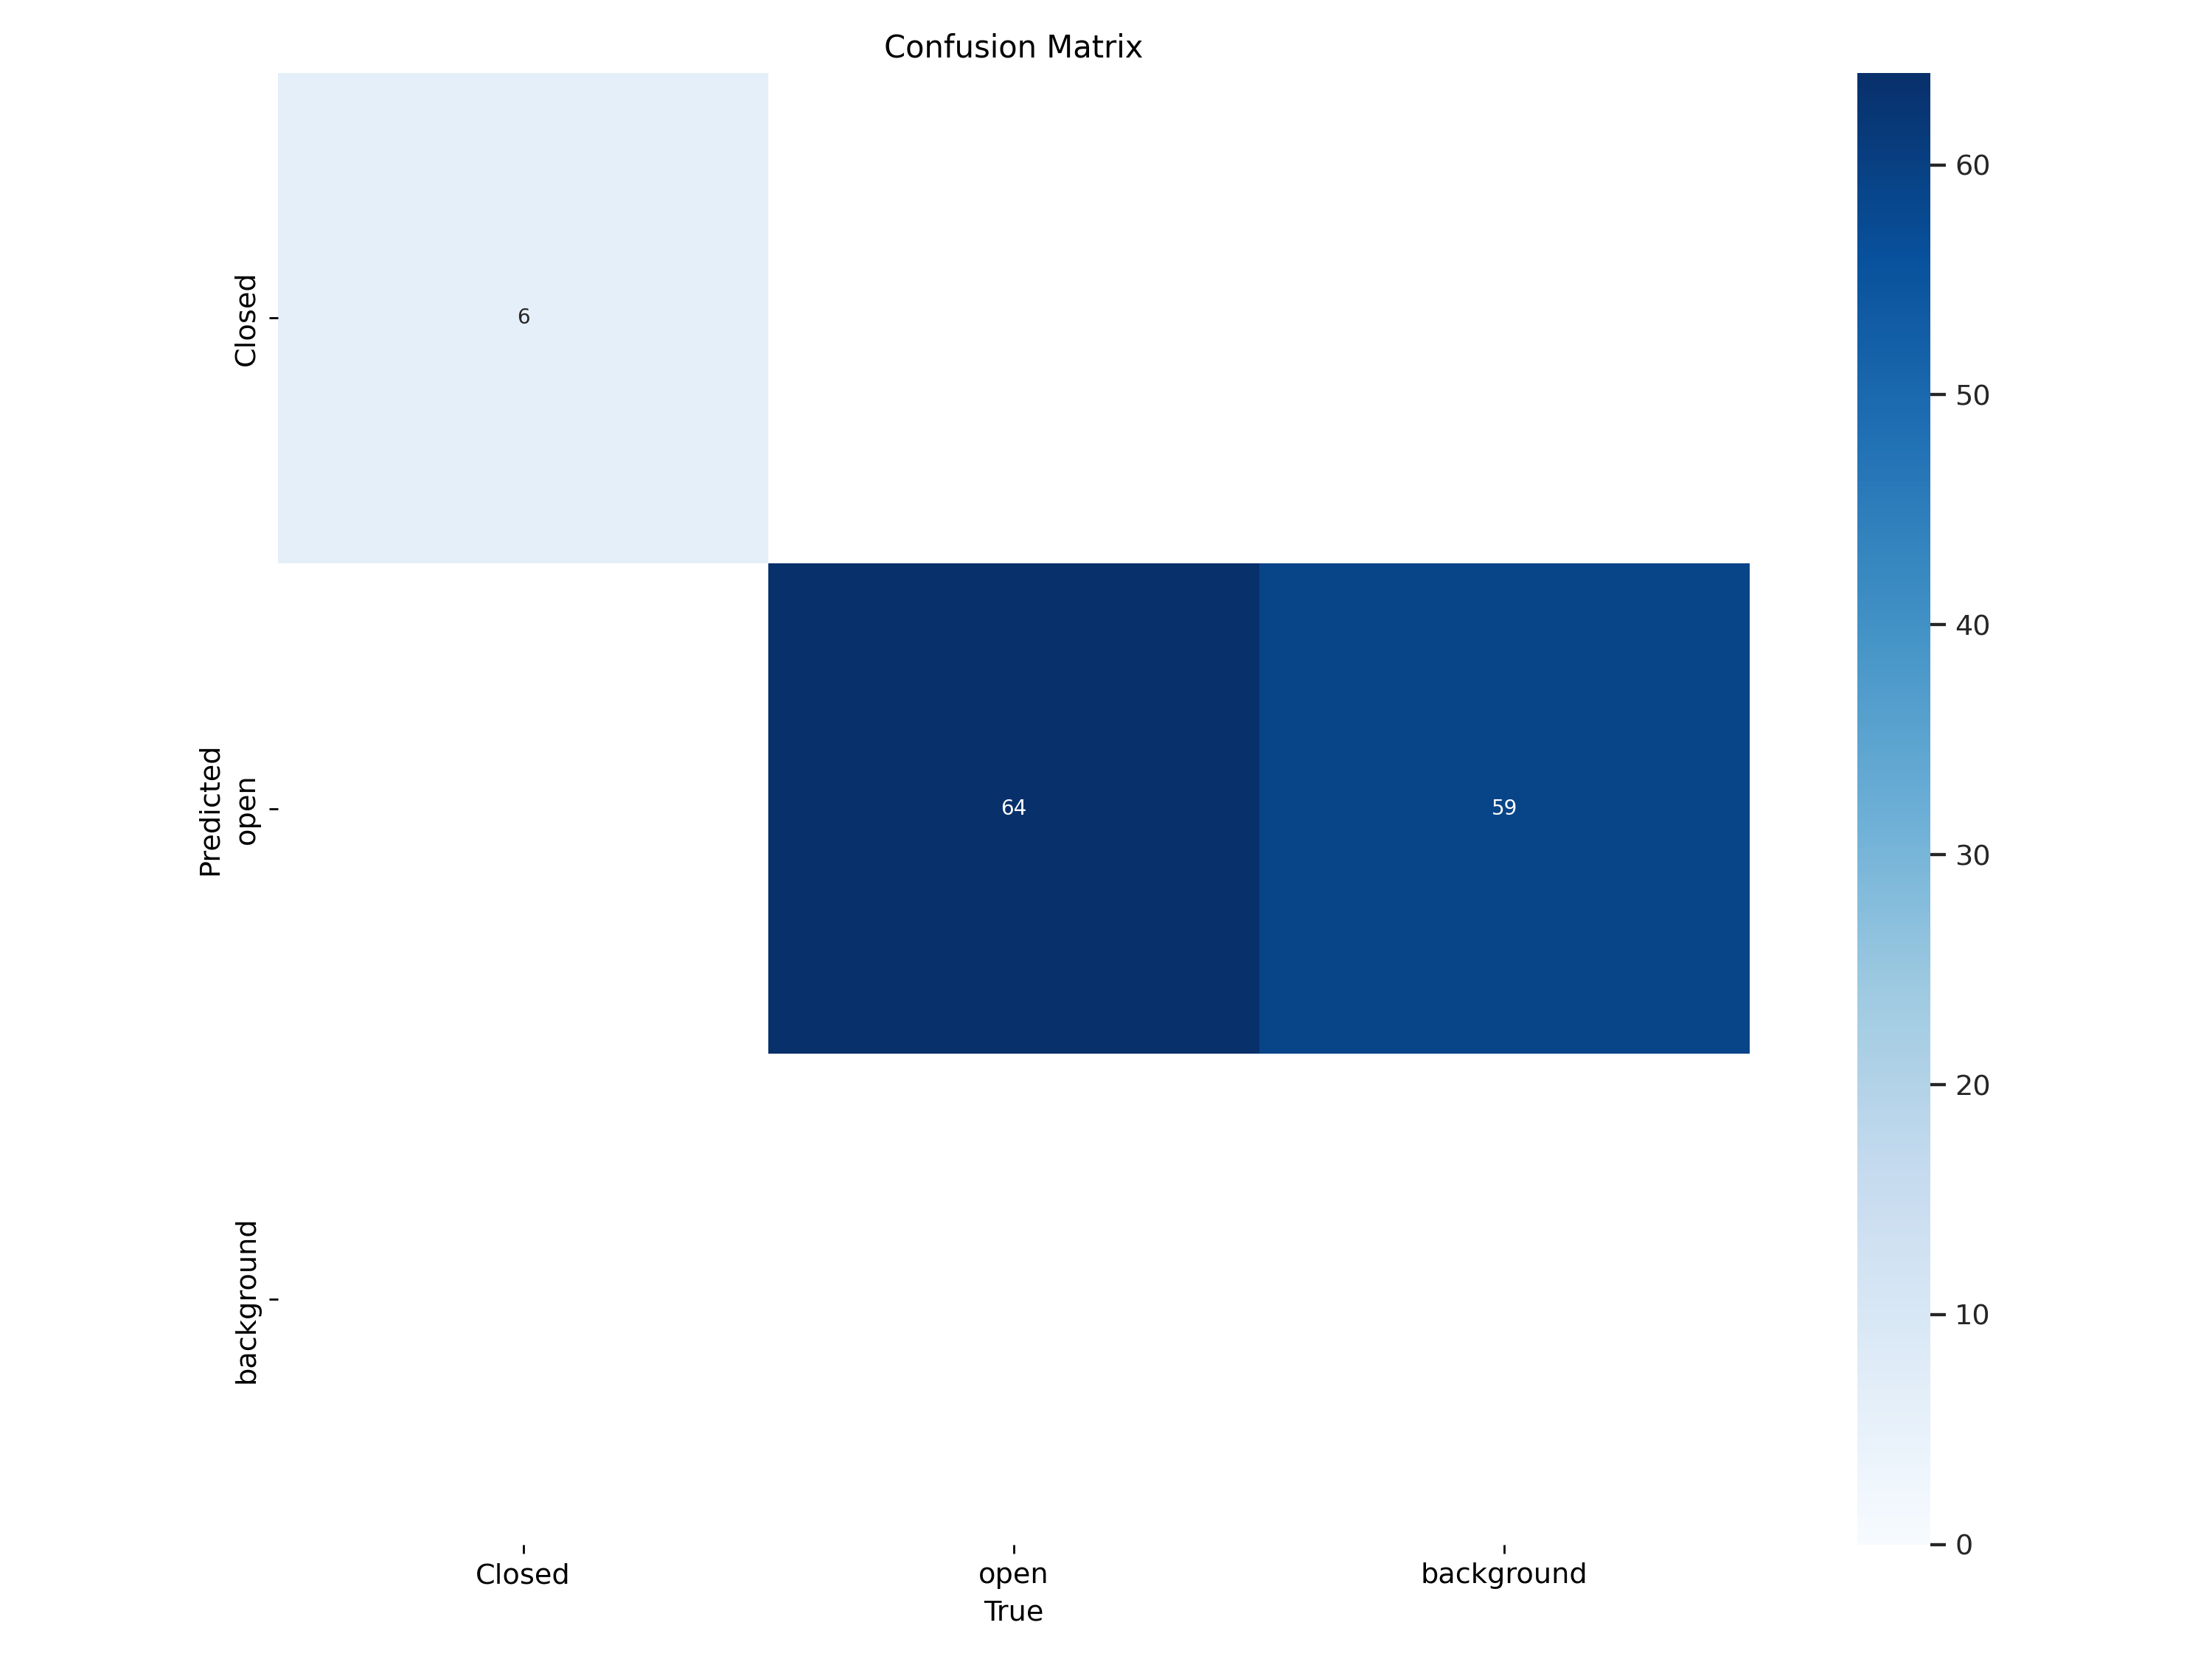

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/kaggle/working


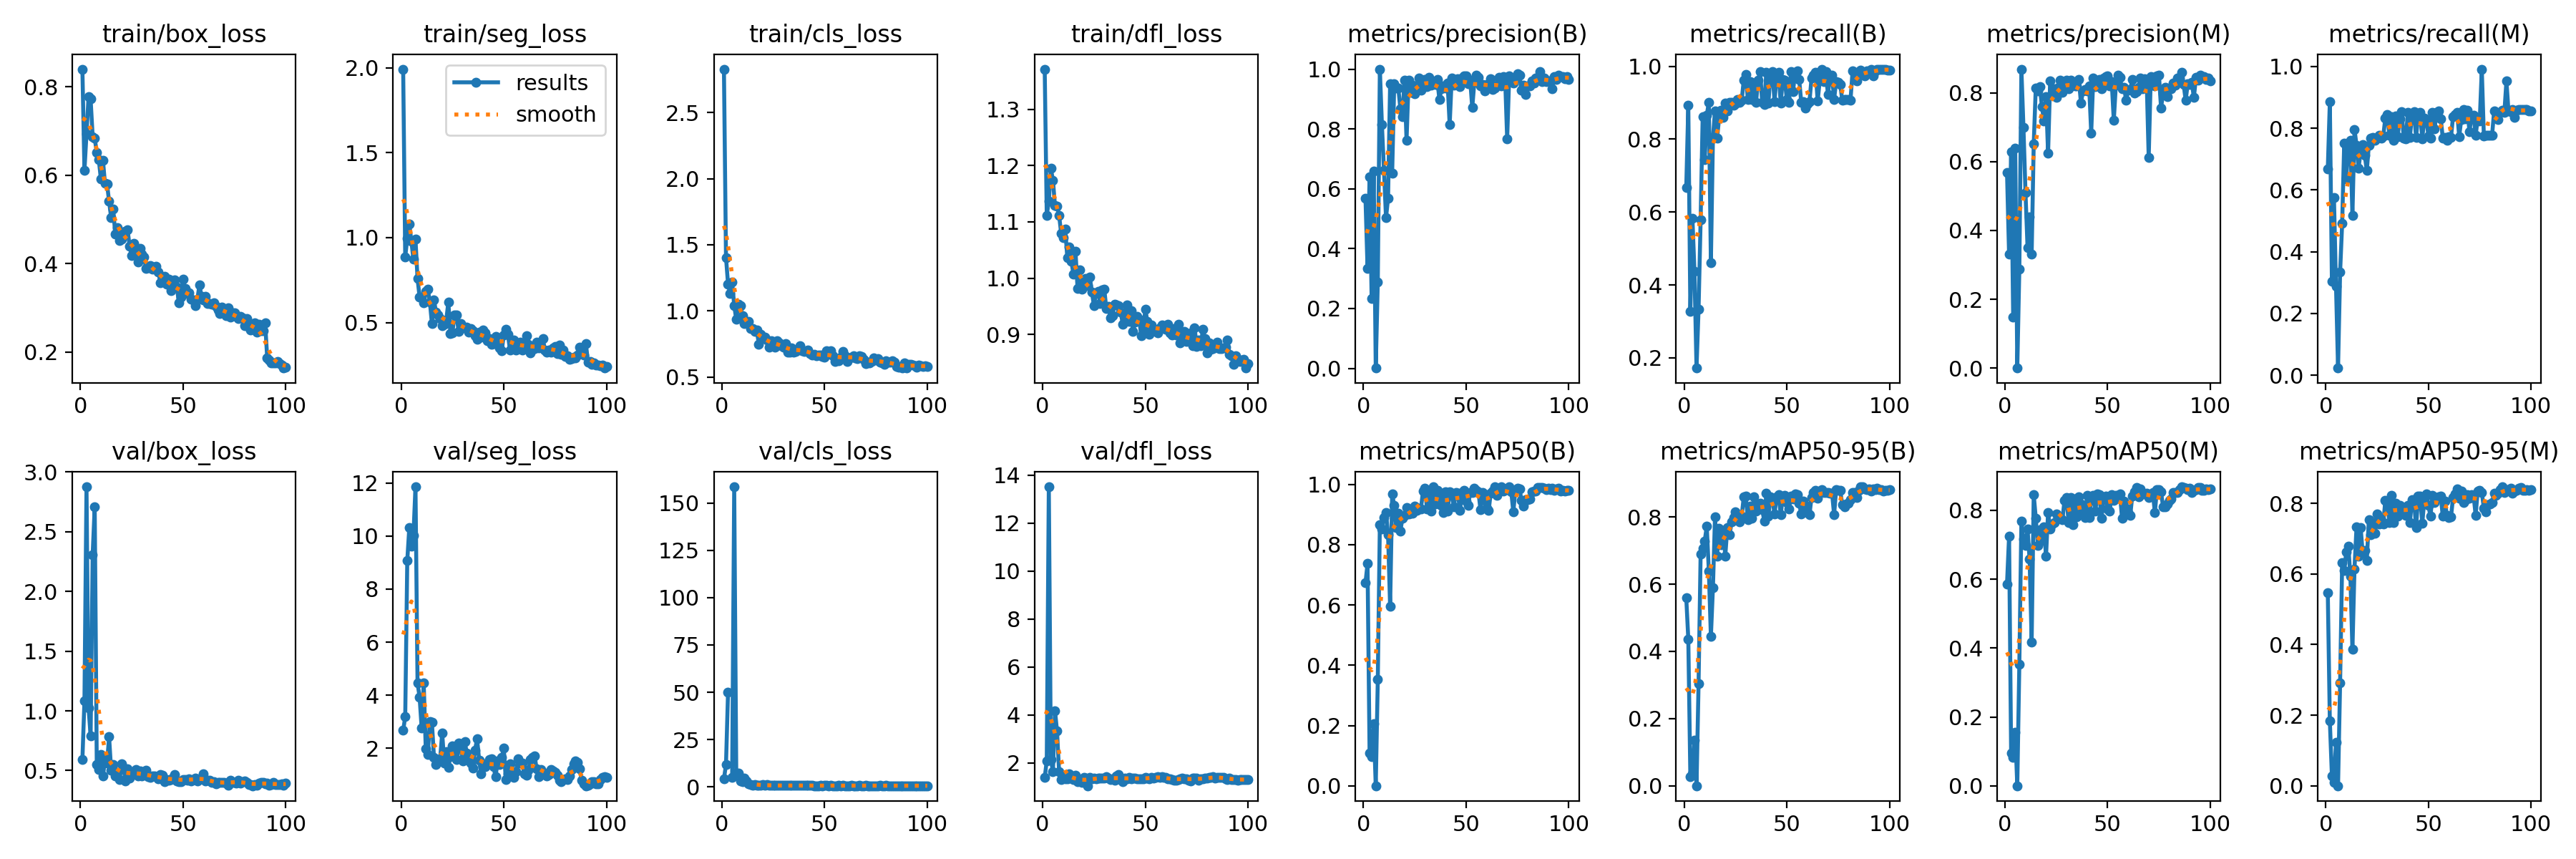

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/kaggle/working


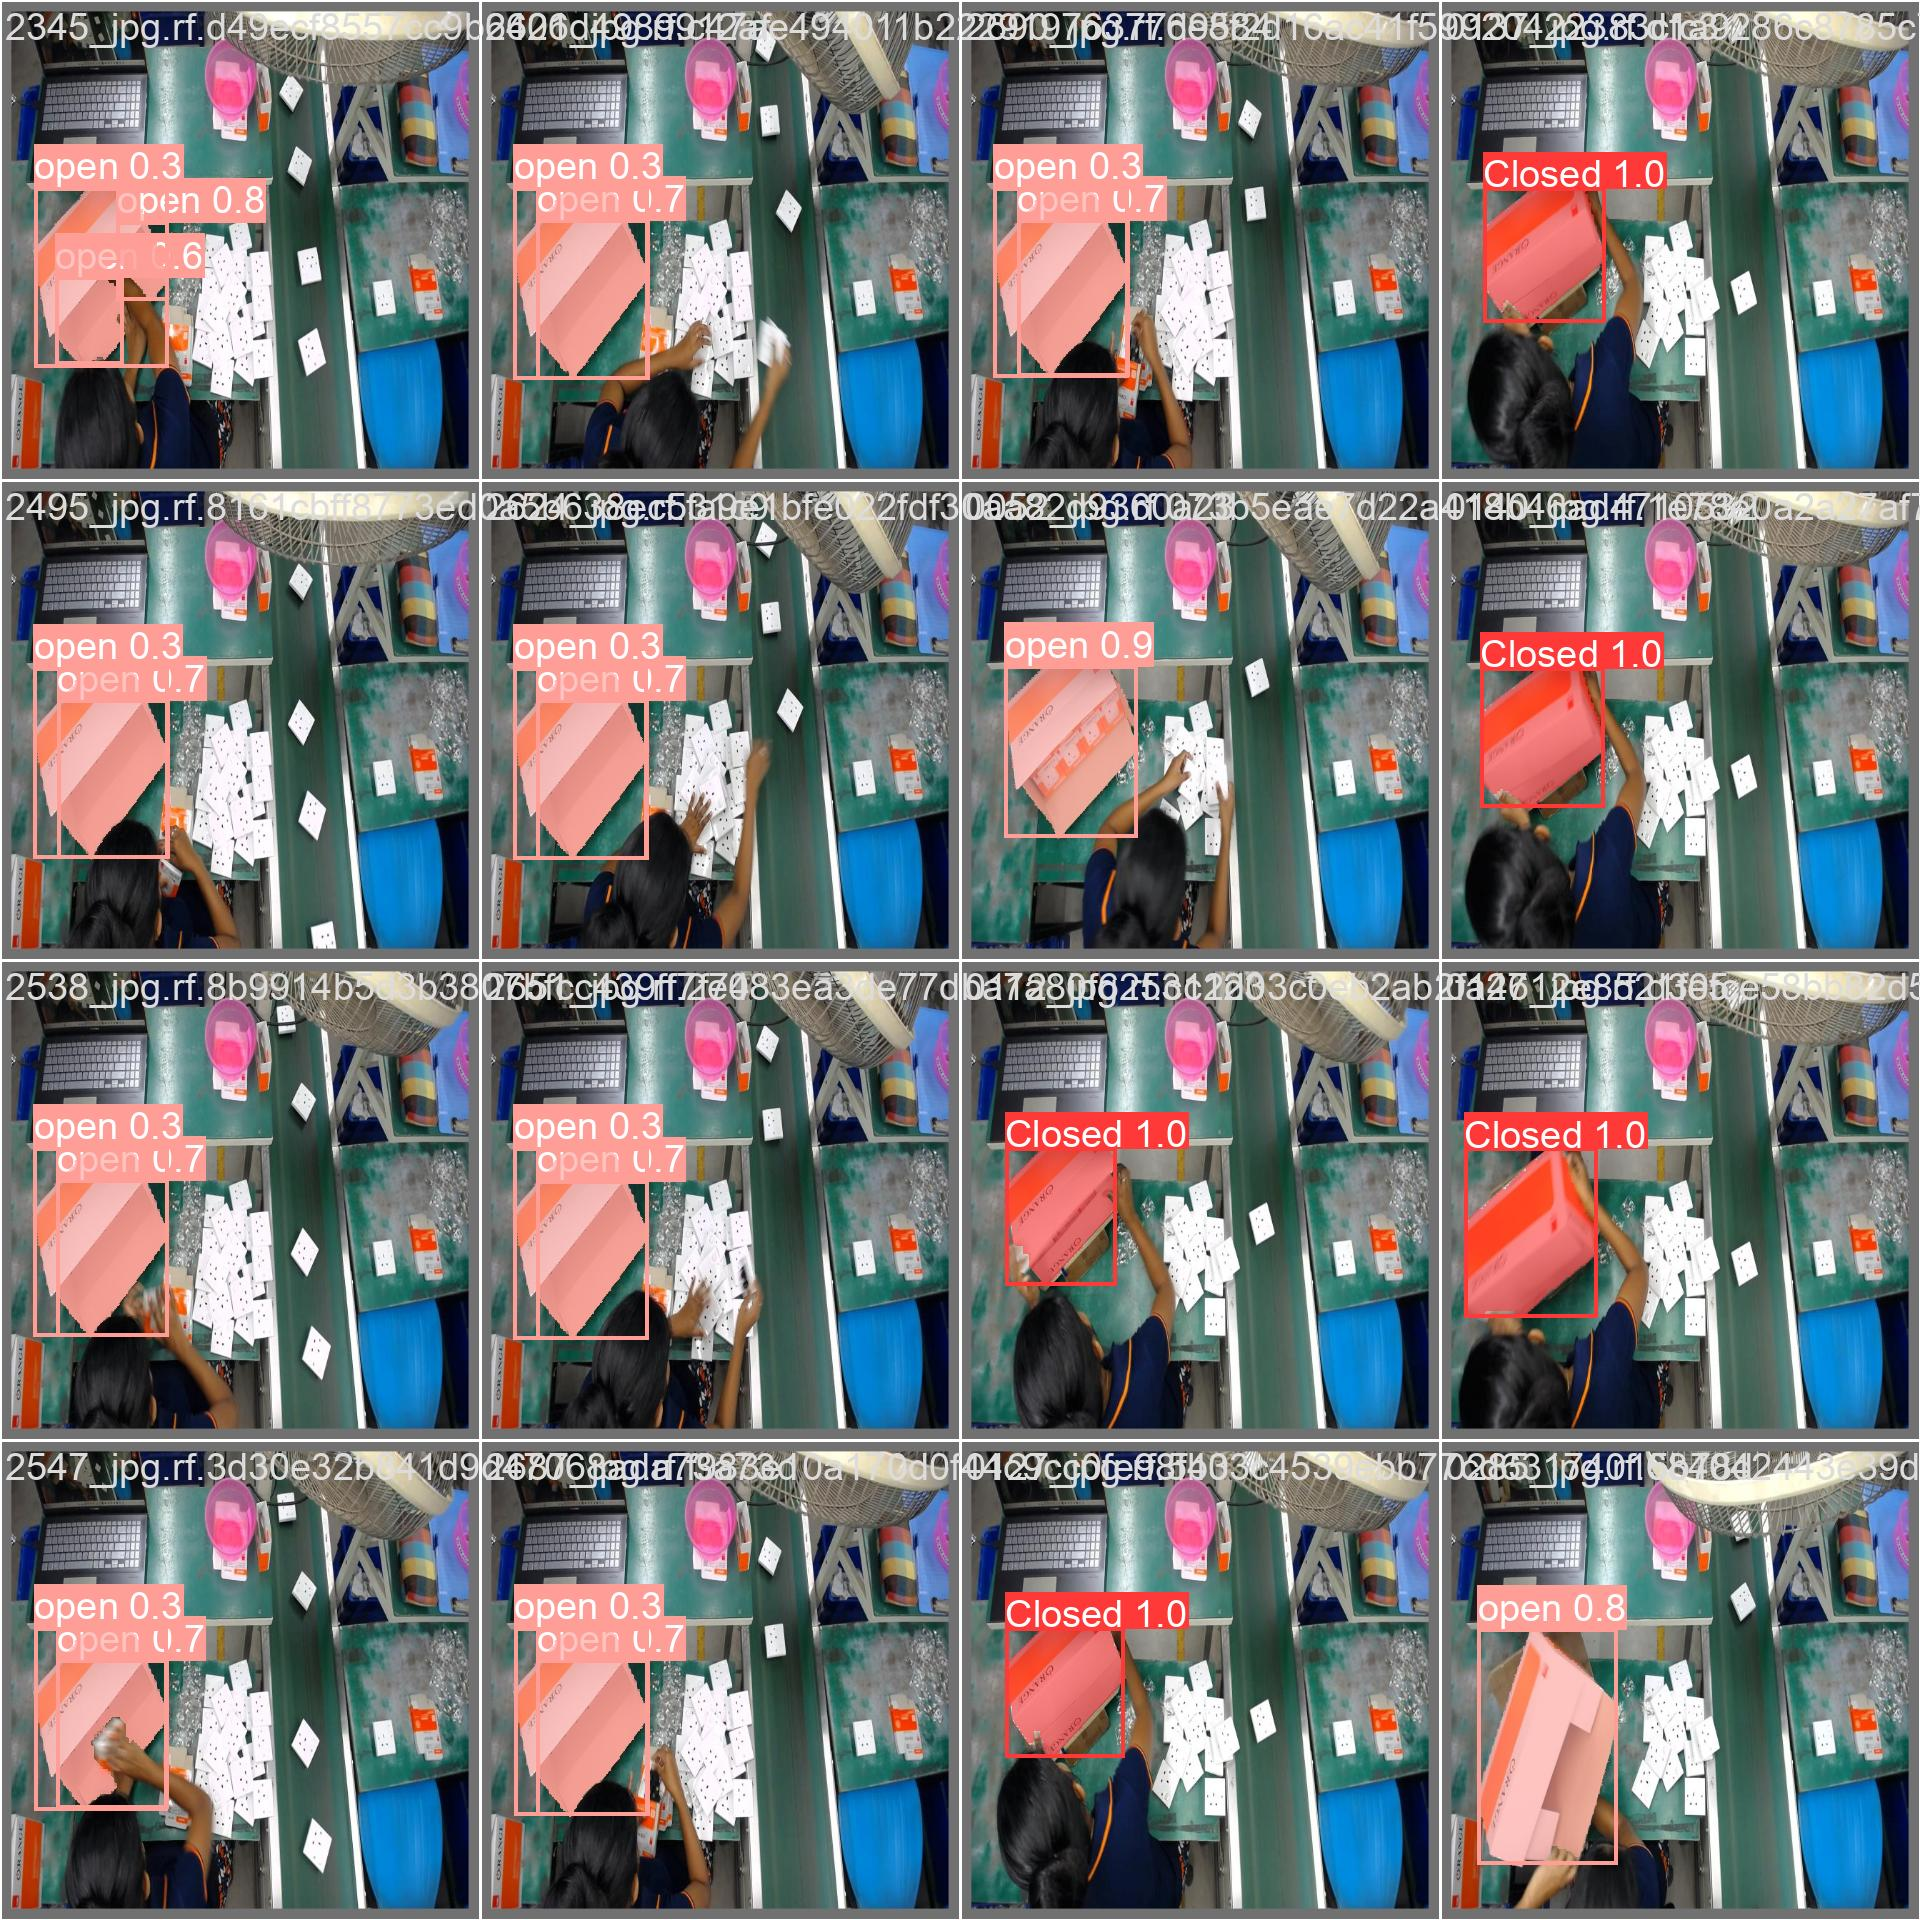

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /kaggle/working/datasets/Mainbox-segmentation-1/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         66         70      0.992       0.99      0.989      0.884      0.859      0.858      0.863      0.839
                Closed         66          6          1          1      0.995      0.995          1          1      0.995      0.995
                  open         66         64      0.984       0.98      0.984      0.773      0.718      0.716      0.731      0.683
Speed: 3.1ms preprocess, 20.2ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs/segment/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [20]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs

image 1/32 /kaggle/working/datasets/Mainbox-segmentation-1/test/images/0120_jpg.rf.d6a60807a48318bcd4cc8ce8150b725d.jpg: 640x640 1 Closed, 16.8ms
image 2/32 /kaggle/working/datasets/Mainbox-segmentation-1/test/images/0148_jpg.rf.c2457bc2af3692d85e88d615da400a0f.jpg: 640x640 1 Closed, 16.9ms
image 3/32 /kaggle/working/datasets/Mainbox-segmentation-1/test/images/0397_jpg.rf.fca2a67e48264429ad979ca3b78655e4.jpg: 640x640 2 opens, 16.8ms
image 4/32 /kaggle/working/datasets/Mainbox-segmentation-1/test/images/0405_jpg.rf.db564f52a275da8a52d28a96d845dc41.jpg: 640x640 1 open, 16.9ms
image 5/32 /kaggle/working/datasets/Mainbox-segmentation-1/test/images/0473_jpg.rf.94be94621151752c3ec5cdeafcf8010b.jpg: 640x640 2 opens, 16.9ms
image 6/32 /kaggle/working/datasets/Mainbox-segmentation-1/test/images/0557

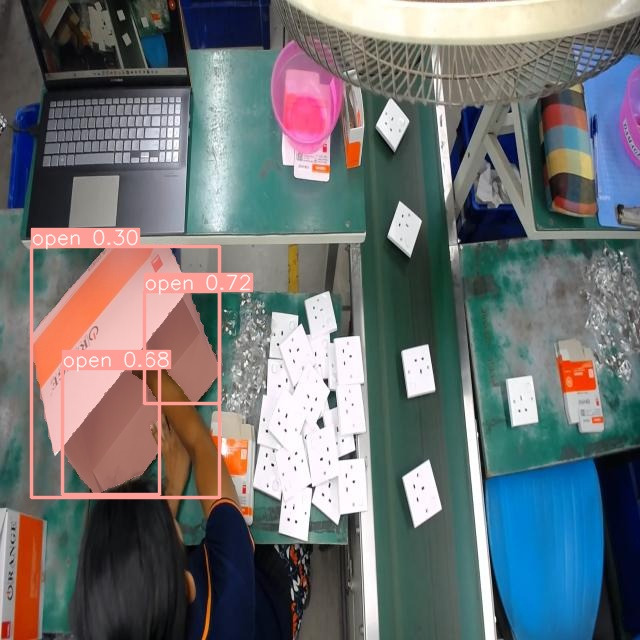

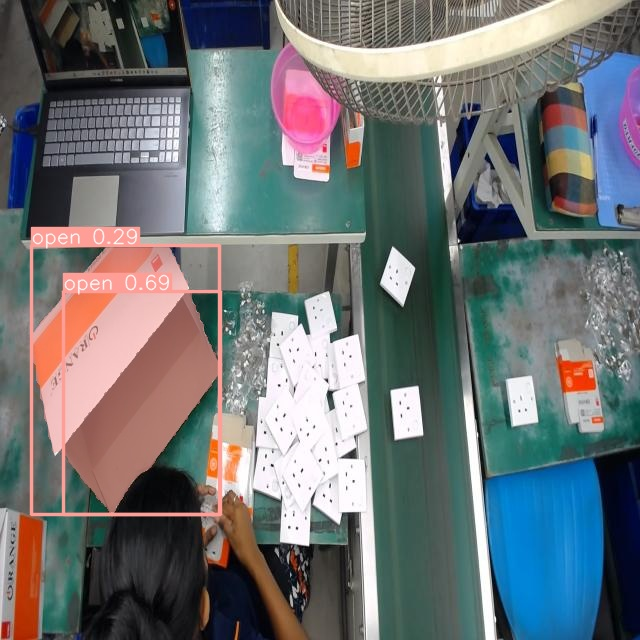

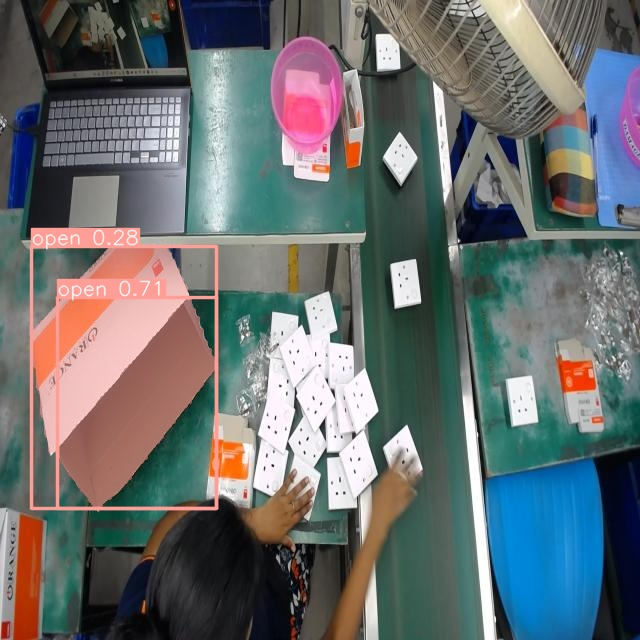

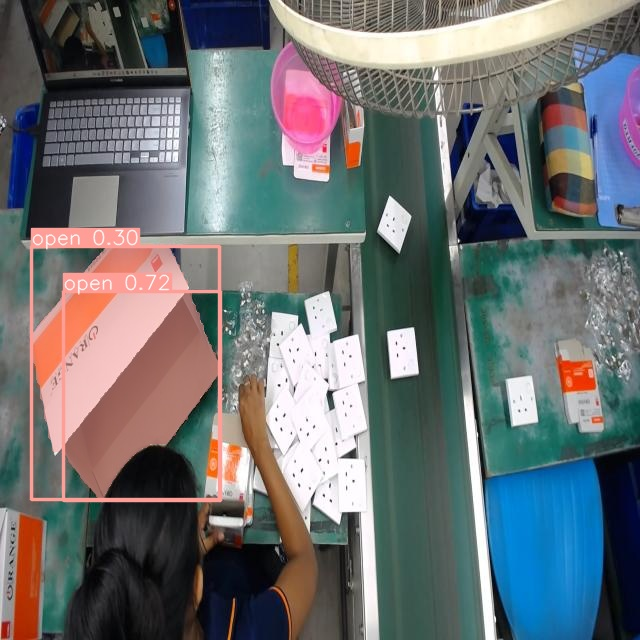

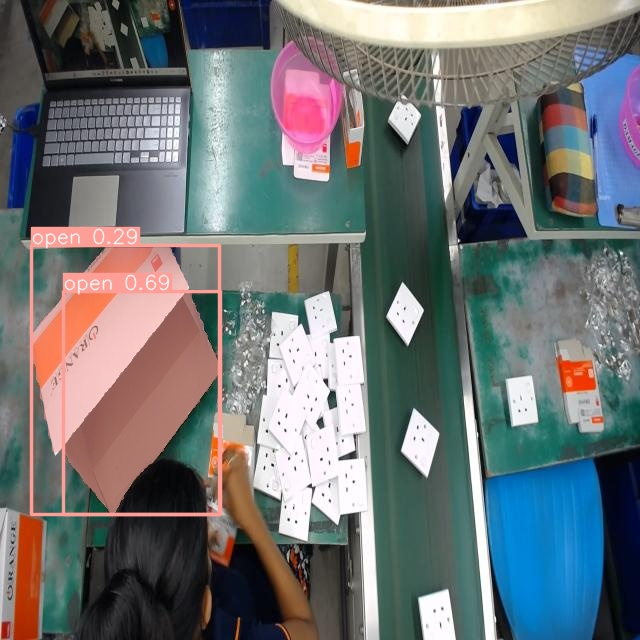

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Save Files

In [23]:
%cd {HOME}/runs/segment/train/
!ls

/kaggle/working/runs/segment/train
BoxF1_curve.png					  results.png
BoxPR_curve.png					  train_batch0.jpg
BoxP_curve.png					  train_batch1.jpg
BoxR_curve.png					  train_batch2.jpg
MaskF1_curve.png				  train_batch2160.jpg
MaskPR_curve.png				  train_batch2161.jpg
MaskP_curve.png					  train_batch2162.jpg
MaskR_curve.png					  val_batch0_labels.jpg
args.yaml					  val_batch0_pred.jpg
confusion_matrix.png				  val_batch1_labels.jpg
confusion_matrix_normalized.png			  val_batch1_pred.jpg
events.out.tfevents.1713443922.d47fe23b4914.88.0  val_batch2_labels.jpg
labels.jpg					  val_batch2_pred.jpg
labels_correlogram.jpg				  weights
results.csv


In [24]:
from tqdm import tqdm
import zipfile

def zip_dir(directory, zip_filename):
    files = os.listdir(directory)
    
    progress = tqdm(total=len(files), desc="Zipping")
    
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        
        for file in files:
            zipf.write(os.path.join(directory, file), arcname=file)
            progress.update(1)
    progress.close()

directory_to_zip = '/kaggle/working/runs/segment/train/'
zip_filename = '/kaggle/working/train_out.zip'

zip_dir(directory_to_zip, zip_filename)

directory_to_zip_2 = '/kaggle/working/runs/segment/train/weights/'
zip_filename_2 = '/kaggle/working/train_weights_out.zip'

zip_dir(directory_to_zip_2, zip_filename_2)

Zipping: 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]


In [25]:
%cd {HOME}

/kaggle/working


In [26]:
from IPython.display import FileLink
FileLink(r'train_out.zip')

/kaggle/working/train_out.zip

In [27]:
FileLink(r'train_weights_out.zip')

/kaggle/working/train_weights_out.zip

In [ ]:
%cd {HOME} 
!yolo pose predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=/kaggle/working/video.mp4

/kaggle/working
WARNING ⚠️ conflicting 'task=pose' passed with 'task=segment' model. Ignoring 'task=pose' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs

video 1/1 (1/8771) /kaggle/working/video.mp4: 384x640 1 open, 112.2ms
video 1/1 (2/8771) /kaggle/working/video.mp4: 384x640 1 open, 15.2ms
video 1/1 (3/8771) /kaggle/working/video.mp4: 384x640 1 open, 14.9ms
video 1/1 (4/8771) /kaggle/working/video.mp4: 384x640 1 open, 15.1ms
video 1/1 (5/8771) /kaggle/working/video.mp4: 384x640 1 open, 15.1ms
video 1/1 (6/8771) /kaggle/working/video.mp4: 384x640 1 open, 15.1ms
video 1/1 (7/8771) /kaggle/working/video.mp4: 384x640 1 open, 15.0ms
video 1/1 (8/8771) /kaggle/working/video.mp4: 384x640 1 open, 15.1ms
video 1/1 (9/8771) /kaggle/working/video.mp4: 384x640 1 open, 15.1ms
video 1/1 (10/8771) /kaggle/working/video.